# WEEK 6

## Summarize segment-wise insights and possible drivers

In [1]:
# Loading Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Updated_Indian_Kids_ScreenTime.csv')
sns.set_style('whitegrid')
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Health_Category,Device_Category,Screen_Size,Concern_Level
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teenagers,Physical Impact,Portable,"<30""",Attention Needed
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-teen,Physical Impact,Portable,"<30""",Attention Needed
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Late-teens,Physical Impact,Wall-mounted,">=30""",Attention Needed
3,15,Female,1.21,Laptop,False,0.39,No Health Impact,Urban,Teenagers,No Health Impact,Portable,"<30""",No Harm
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-teen,"Physical, Mental Impact",Portable,"<30""",Attention Needed


Average Screen Time (Hours/Day) by Age Band and Primary Device:


Primary_Device,Laptop,Smartphone,TV,Tablet
Age_Band,,,,
Late-teens,4.55,4.54,4.48,4.56
Pre-teen,4.45,4.21,4.08,4.04
Teenagers,4.42,4.51,4.59,4.46



Average Screen Time (Hours/Day) by Gender:


,Gender,Avg_Daily_Screen_Time_hr
0,Female,4.33
1,Male,4.38



Average Screen Time (Hours/Day) by Location:


,Urban_or_Rural,Avg_Daily_Screen_Time_hr
0,Rural,4.37
1,Urban,4.34


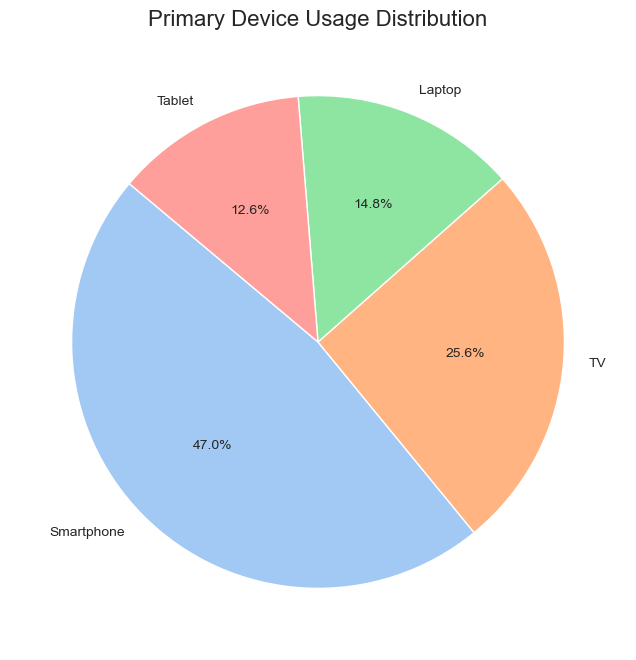

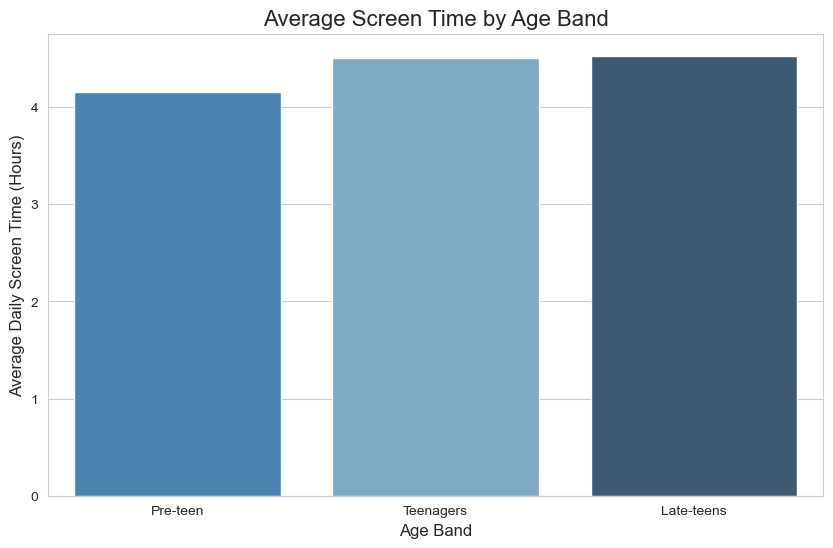

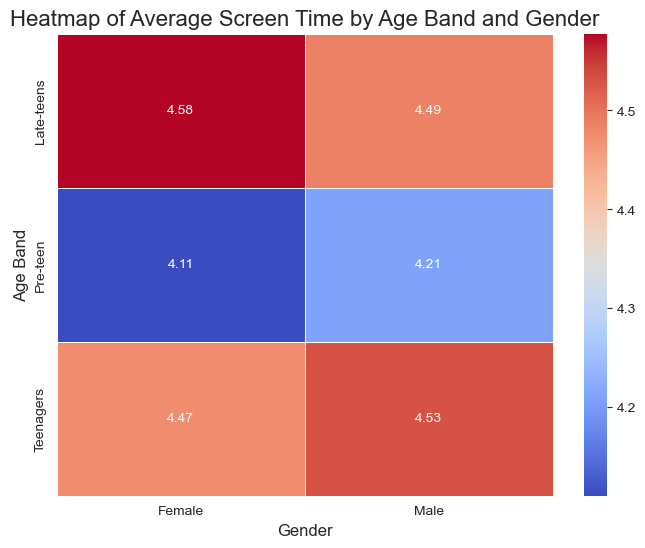

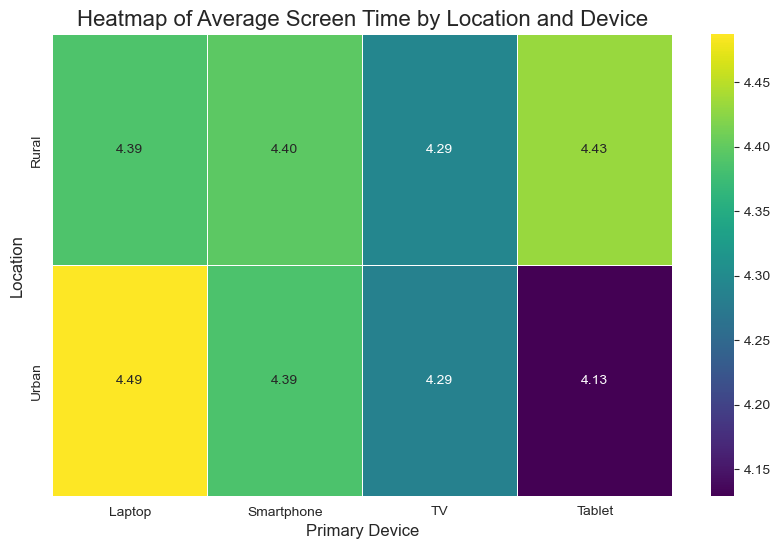

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Updated_Indian_Kids_ScreenTime.csv")

# Create pivot table for average screen time by Age Band and Primary Device
avg_screen_time_age_device = pd.pivot_table(
    data,
    values='Avg_Daily_Screen_Time_hr',
    index='Age_Band',
    columns='Primary_Device',
    aggfunc='mean'
).round(2)

# Average screen time by Gender
avg_screen_time_gender = data.groupby('Gender')['Avg_Daily_Screen_Time_hr'].mean().round(2).reset_index()

# Average screen time by Location
avg_screen_time_location = data.groupby('Urban_or_Rural')['Avg_Daily_Screen_Time_hr'].mean().round(2).reset_index()

from IPython.display import display

print("Average Screen Time (Hours/Day) by Age Band and Primary Device:")
display(avg_screen_time_age_device)

print("\nAverage Screen Time (Hours/Day) by Gender:")
display(avg_screen_time_gender)

print("\nAverage Screen Time (Hours/Day) by Location:")
display(avg_screen_time_location)


                                                               #     Visuals


sns.set_style("whitegrid")

# Visual 1: Pie Chart for Primary Device Usage
plt.figure(figsize=(8, 8))
device_counts = data['Primary_Device'].value_counts()
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Primary Device Usage Distribution', fontsize=16)
plt.ylabel('') 
plt.show()

# Visual 2: Bar Chart for Average Screen Time by Age Band
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=data, hue='Age_Band', palette='Blues_d', order=['Pre-teen', 'Teenagers', 'Late-teens'], errorbar=None)
plt.title('Average Screen Time by Age Band', fontsize=16)
plt.xlabel('Age Band', fontsize=12)
plt.ylabel('Average Daily Screen Time (Hours)', fontsize=12)
plt.show()

# Visual 3: Heatmap for Screen Time by Age Band and Gender
pivot_age_gender = data.pivot_table(values='Avg_Daily_Screen_Time_hr', index='Age_Band', columns='Gender', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_age_gender, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title('Heatmap of Average Screen Time by Age Band and Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age Band', fontsize=12)
plt.show()

# Visual 4: Heatmap for Screen Time by Location and Device
pivot_location_device = data.pivot_table(values='Avg_Daily_Screen_Time_hr', index='Urban_or_Rural', columns='Primary_Device', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_location_device, annot=True, fmt=".2f", cmap="viridis", linewidths=.5)
plt.title('Heatmap of Average Screen Time by Location and Device', fontsize=16)
plt.xlabel('Primary Device', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.show()



## Insights by Segment

**1. Age is a Primary Differentiator**
Older children consistently log more screen time. The transition from pre-teen to the teenage years marks a significant increase in usage, which remains high for late-teens.​

**Pre-teens (Ages <13):** Average around 4.16 hours daily. Their usage is more distributed across devices, with a significant portion still using TVs and tablets. This group also has a slightly higher ratio of educational to recreational content compared to older cohorts, particularly on tablets and TVs.
**Teenagers (Ages 13-17):** Screen time jumps to an average of 4.50 hours daily. Smartphones become the dominant device, and the content ratio shifts more towards recreation.
**Late-teens (Ages 18+):** This group has the highest average screen time at 4.53 hours per day. Device usage consolidates around personal devices like smartphones and laptops.

**2. Device Type Dictates Usage Patterns**
The primary device is a strong indicator of screen time duration and the nature of the content consumed.

**Smartphones:** The most prevalent device, used by nearly half of the children in the dataset. It is associated with high screen time across all age groups, especially teenagers.

**TV and Laptops:** Teenagers using TVs and late-teens using laptops and tablets show the highest average screen time, exceeding 4.5 hours per day. This suggests that long-form content (movies, series, games) on larger screens contributes significantly to total duration.

**Tablets:** While less common, tablets are linked to the highest average screen time among late-teens (4.56 hours). For pre-teens, tablets are associated with a higher educational-to-recreational content ratio.

**3. Demographic Factors (Gender and Location) Show Nuance**
On the surface, gender and location (urban vs. rural) do not appear to be major drivers, as the average screen times are very similar.

**Gender:** Males (4.38 hours) have slightly higher average screen time than females (4.33 hours).
**Location:** Children in rural areas (4.37 hours) surprisingly show slightly higher average screen time than their urban counterparts (4.34 hours). This could be driven by fewer alternative recreational activities.


##  Drivers of High Screen Time and Concern
The analysis points to a combination of factors that drive higher screen time and elevate the "Concern Level."

**High Screen Time Duration:** This is the most direct driver. The data clearly shows that higher "Concern Levels" are correlated with significantly more hours of screen time.​

No Harm: 0.88 hours/day

Attention Needed: 4.26 hours/day

High Concern: 6.91 hours/day

Extreme Concern: 11.18 hours/day

**Device Accessibility and Type:** The combination of a user's age and their primary device is a powerful driver. Teenagers and late-teens with personal, portable devices (smartphones, laptops) are most at risk of high usage. The portability allows for constant access, integrating screen time into all parts of the day.

**Content Consumption (Educational vs. Recreational Ratio):** While not as strong a driver as total duration, the type of content matters. The "Extreme Concern" group has a higher educational-to-recreational ratio (0.52) than other groups. This counterintuitive finding suggests that even "educational" screen time, when excessive, contributes to the highest risk levels. It may indicate that sheer volume is the ultimate problem, regardless of content, or that the content labeling is misleading.

**Age-Related Social and Educational Norms:** The sharp increase in screen time during the teenage years points to external drivers like social media engagement, online gaming, and increased use of digital tools for school, which normalize prolonged device use.

## Key Drivers of Screen Time Usage
The analysis reveals that as children age, their interaction with digital media, driven by a combination of environmental, social, and personal factors.

**1. Demographic and Environmental Factors**
**Age** This is a primary driver, with screen time consistently increasing as children get older. The analysis of the provided data shows a clear upward trend from pre-teen years through the late teens. External studies support this, with 2019 data showing 8 to 12-year-olds averaging nearly five hours of daily screen time, which rises to 7.5 hours for teenagers (13–18).

**Location** A significant finding is the "urban versus rural divide," where children in urban areas exhibit drastically higher screen time than their rural counterparts. This is attributed to factors like greater access to devices and different lifestyles.

**Gender Males** tend to have higher average screen time, and this gap widens with age. In the late-teen group (ages 17–18), males show a noticeably higher median screen time and a wider range of usage compared to females.

**2. Device and Content Consumption**
The type of device and the content consumed are also key drivers.

Primary Device Smartphones are the most used primary device across all age groups, followed by laptops. The data reveals that cohorts with some of the highest average screen time include teenagers using TVs and late-teens using portable devices like smartphones and laptops.

**3. Behavioral and Health-Related Factors**
Health and Behavior High screen time is linked to negative health outcomes. Poor sleep was the most frequently reported health impact in the analyzed data, followed by eye strain. This is consistent with broader research, which links excessive screen time to problems like anxiety, depression, and aggression

## Final cohort insights 
Teenagers and late-teens form the highest-risk cohorts, with TV- and smartphone-led usage clusters showing the greatest average screen time, and risk sharply escalating with total daily hours irrespective of content label.

### Top cohorts
Teenagers on TV average about 4.59 hours/day (735 users), indicating long-form viewing as a key usage pattern in this cohort.

Late-teens on tablets and laptops average roughly 4.56 and 4.55 hours/day respectively, highlighting portable personal screens as persistent high-usage drivers.

Teenagers on smartphones average about 4.51 hours/day (1,760 users), confirming the dominance of mobile-first behavior in mid-adolescence.

**Cross-cutting drivers**
Age progression amplifies usage from pre-teen to late-teen cohorts, with smartphones and personal laptops concentrating higher time-on-device as autonomy and access increase.

Content mix is secondary to volume: the “Extreme Concern” group shows the highest time (≈11.18 h/day) despite a higher educational-to-recreational ratio, implying duration is the primary risk lever.

**Risk linkage**
Concern level scales near-linearly with hours: No Harm ≈0.88 h, Attention Needed ≈4.26 h, High Concern ≈6.91 h, Extreme Concern ≈11.18 h/day, underscoring time thresholds as actionable control points.

Health impacts cluster around poor sleep and physical effects across age bands, reinforcing a sleep-first mitigation strategy for high-usage cohorts.

**What to act on**
Prioritize controls for teenagers and late-teens on smartphones/laptops: set caps, disable autoplay, and enforce device-free routines anchored to sleep and study blocks.

Shift “educational” binges to scheduled, time-boxed sessions; pair with outdoor and social activities to displace discretionary screen windows.

Use household rules and parental modeling (no screens at meals/bedrooms) to compress peak risk windows and stabilize routines.